In [9]:
import numpy as np

In [3]:
import pandas as pd

In [10]:
np.random.seed(42)

In [16]:
employee_id=[f"Emp_{i:03d}"for i in range(1,31)]
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")
employee_id

['Emp_001',
 'Emp_002',
 'Emp_003',
 'Emp_004',
 'Emp_005',
 'Emp_006',
 'Emp_007',
 'Emp_008',
 'Emp_009',
 'Emp_010',
 'Emp_011',
 'Emp_012',
 'Emp_013',
 'Emp_014',
 'Emp_015',
 'Emp_016',
 'Emp_017',
 'Emp_018',
 'Emp_019',
 'Emp_020',
 'Emp_021',
 'Emp_022',
 'Emp_023',
 'Emp_024',
 'Emp_025',
 'Emp_026',
 'Emp_027',
 'Emp_028',
 'Emp_029',
 'Emp_030']

In [24]:
data={
    "Date":np.tile(dates,len(employee_id)),
    "Employee_id":np.repeat(employee_id,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_id))
}
df=pd.DataFrame(data)

In [25]:
df.to_csv("employee_working_hours.csv",index=False)

In [27]:
#Read from csv
df_csv=pd.read_csv("employee_working_hours.csv")

In [40]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_id"].nunique())

         Date Employee_id  Working_Hours
0  2025-07-01     Emp_001       6.247241
1  2025-07-02     Emp_001       9.704286
2  2025-07-03     Emp_001       8.391964
3  2025-07-04     Emp_001       7.591951
4  2025-07-05     Emp_001       4.936112
       Working_Hours
count     900.000000
mean        6.954250
std         1.762121
min         4.027792
25%         5.383714
50%         7.011134
75%         8.486632
max         9.998306
30


In [44]:
#Total hours per emplloyee
total_hours=df_csv.groupby("Employee_id")["Working_Hours"].sum().sort_values(ascending=False)


In [45]:
avg_daily=df_csv.groupby("Employee_id")["Working_Hours"].mean()


In [47]:
threshold_low=5
threshold_high=9
df_csv["Low_Hours_Flag"]=df_csv["Working_Hours"] < threshold_low
df_csv["High_Hours_Flag"]=df_csv["Working_Hours"] >threshold_high

In [50]:
print(df_csv[df_csv["Low_Hours_Flag"]|df_csv["High_Hours_Flag"]].head())

         Date Employee_id  Working_Hours  Low_Hours_Flag  High_Hours_Flag
1  2025-07-02     Emp_001       9.704286           False             True
4  2025-07-05     Emp_001       4.936112            True            False
5  2025-07-06     Emp_001       4.935967            True            False
6  2025-07-07     Emp_001       4.348502            True            False
7  2025-07-08     Emp_001       9.197057           False             True


In [51]:
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns

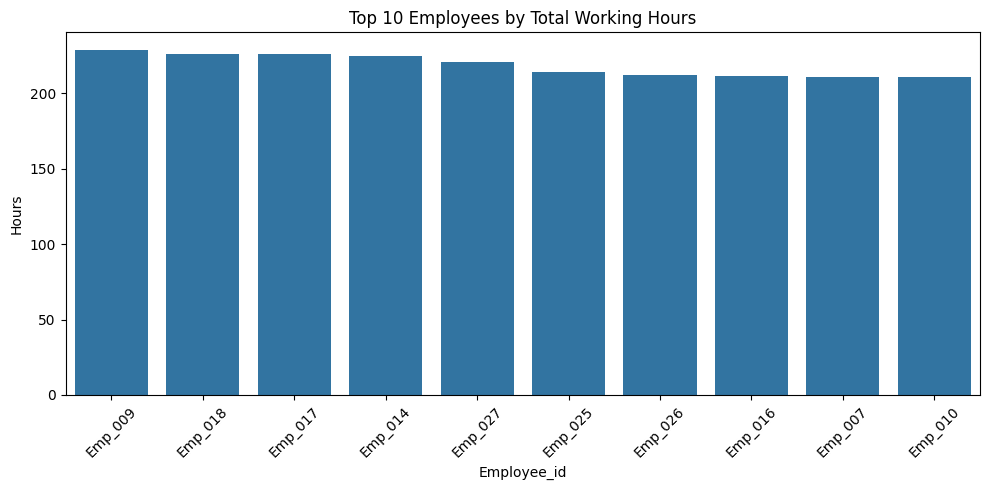

In [53]:
#Bar chart of top 10 employees with highest total hours
top10= total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()